# FORECASTING EXCHANGE RATES USING TIME SERIES ANALYSIS
### Objective:
Leverage ARIMA and Exponential Smoothing techniques to forecast future exchange rates based on historical data provided in the exchange_rate.csv dataset. 
### Dataset:
The dataset contains historical exchange rate with each column representing a different currency rate over time. The first column indicates the date, and second column represent exchange rates USD to Australian Dollar.
### Part 1: Data Preparation and Exploration
1. Data Loading: Load the exchange_rate.csv dataset and parse the date column appropriately.
2. Initial Exploration: Plot the time series for currency to understand their trends, seasonality, and any anomalies.
3. Data Preprocessing: Handle any missing values or anomalies identified during the exploration phase.
### Part 2: Model Building - ARIMA
1. Parameter Selection for ARIMA: Utilize ACF and PACF plots to estimate initial parameters (p, d, q) for the ARIMA model for one or more currency time series.
2. Model Fitting: Fit the ARIMA model with the selected parameters to the preprocessed time series.
3. Diagnostics: Analyze the residuals to ensure there are no patterns that might indicate model inadequacies.
4. Forecasting: Perform out-of-sample forecasting and visualize the predicted values against the actual values.
### Part 3: Model Building - Exponential Smoothing
1. Model Selection: Depending on the time series characteristics, choose an appropriate Exponential Smoothing model (Simple, Holt’s Linear, or Holt-Winters).
2. Parameter Optimization: Use techniques such as grid search or AIC to find the optimal parameters for the smoothing levels and components.
3. Model Fitting and Forecasting: Fit the chosen Exponential Smoothing model and forecast future values. Compare these forecasts visually with the actual data.
### Part 4: Evaluation and Comparison
1. Compute Error Metrics: Use metrics such as MAE, RMSE, and MAPE to evaluate the forecasts from both models.
2. Model Comparison: Discuss the performance, advantages, and limitations of each model based on the observed results and error metrics.
3. Conclusion: Summarize the findings and provide insights on which model(s) yielded the best performance for forecasting exchange rates in this dataset.

Deliverables:
+ Include visualizations and explanations for the choices and findings at each step.
+ Well-commented Python code that used to conduct the analysis and build the models.
Assessment Criteria:
+ Accuracy and completeness of the data preparation and exploration steps.
+ Justification for model selection and parameter tuning decisions.
+ Clarity and depth of the analysis in the diagnostics and model evaluation stages.
This assignment offers a hands-on experience with real-world data, applying sophisticated time series forecasting methods to predict future currency exchange rates.



### Part 1: Data Preparation and Exploration
1. Data Loading: Load the exchange_rate.csv dataset and parse the date column appropriately.
2. Initial Exploration: Plot the time series for currency to understand their trends, seasonality, and any anomalies.
3. Data Preprocessing: Handle any missing values or anomalies identified during the exploration phase.

In [1]:
import warnings
warnings.filterwarnings('ignore')

###### 1. Data Loading: Load the exchange_rate.csv dataset and parse the date column appropriately.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading the dataset
df = pd.read_csv("exchange_rate.csv",index_col='date',parse_dates=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7588 entries, 1990-01-01 to 2010-10-10
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ex_rate  7588 non-null   float64
dtypes: float64(1)
memory usage: 118.6 KB


In [4]:
df.head()

,Ex_rate
date,
1990-01-01,0.7855
1990-02-01,0.7818
1990-03-01,0.7867
1990-04-01,0.7860
1990-05-01,0.7849


In [5]:
df.describe()

,Ex_rate
count,7588.000000
mean,0.776974
std,0.136620
min,0.483297
25%,0.701422
50%,0.761377
75%,0.873477
max,1.102536


In [6]:
df.index

DatetimeIndex(['1990-01-01', '1990-02-01', '1990-03-01', '1990-04-01',
               '1990-05-01', '1990-06-01', '1990-07-01', '1990-08-01',
               '1990-09-01', '1990-10-01',
               ...
               '2010-01-10', '2010-02-10', '2010-03-10', '2010-04-10',
               '2010-05-10', '2010-06-10', '2010-07-10', '2010-08-10',
               '2010-09-10', '2010-10-10'],
              dtype='datetime64[ns]', name='date', length=7588, freq=None)

In [7]:
df = df.sort_index()

In [8]:
print(df.index.to_series().diff().value_counts())

1 days     7576
3 days        9
22 days       2
Name: date, dtype: int64


In [9]:
df = df.resample('MS').mean()  
df.index.freq = 'MS' 

In [10]:
df.head(2)

,Ex_rate
date,
1990-01-01,0.769661
1990-02-01,0.765589


###### 2. Initial Exploration: Plot the time series for currency to understand their trends, seasonality, and any anomalies.

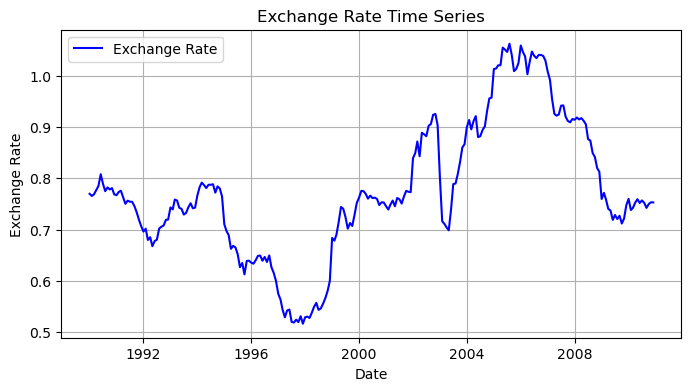

In [11]:
plt.figure(figsize=(8, 4))
plt.plot(df.index, df['Ex_rate'], label='Exchange Rate', color='blue')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.title('Exchange Rate Time Series')
plt.legend()
plt.grid()
plt.show()


###### 3. Data Preprocessing: Handle any missing values or anomalies identified during the exploration phase

In [12]:
# checking for null values
df.isnull().sum()
# No null values present

Ex_rate    0
dtype: int64

### Part 2: Model Building - ARIMA
1. Parameter Selection for ARIMA: Utilize ACF and PACF plots to estimate initial parameters (p, d, q) for the ARIMA model for one or more currency time series.
2. Model Fitting: Fit the ARIMA model with the selected parameters to the preprocessed time series.
3. Diagnostics: Analyze the residuals to ensure there are no patterns that might indicate model inadequacies.
4. Forecasting: Perform out-of-sample forecasting and visualize the predicted values against the actual values.

###### 1. Parameter Selection for ARIMA: Utilize ACF and PACF plots to estimate initial parameters (p, d, q) for the ARIMA model for one or more currency time series.

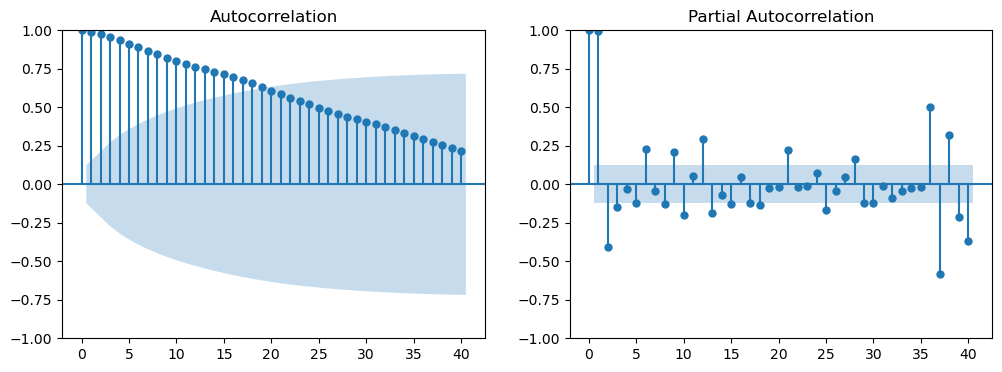

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF and PACF to identify p and q values
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(df['Ex_rate'], lags=40, ax=axes[0])  # AutoCorrelation Function (ACF)
plot_pacf(df['Ex_rate'], lags=40, ax=axes[1])  # Partial AutoCorrelation Function (PACF)
plt.show()


Here The code plots the ACF and PACF graphs to help identify the order of AR (p) and MA (q) terms for a time series model using the 'Ex_rate' column from the dataset.

###### 2. Model Fitting: Fit the ARIMA model with the selected parameters to the preprocessed time series.

In [14]:
from statsmodels.tsa.arima.model import ARIMA

# Define ARIMA model (use estimated p, d, q values from ACF & PACF plots)
model = ARIMA(df['Ex_rate'], order=(1, 1, 1))  
arima_result = model.fit()

###### 3. Diagnostics: Analyze the residuals to ensure there are no patterns that might indicate model inadequacies.

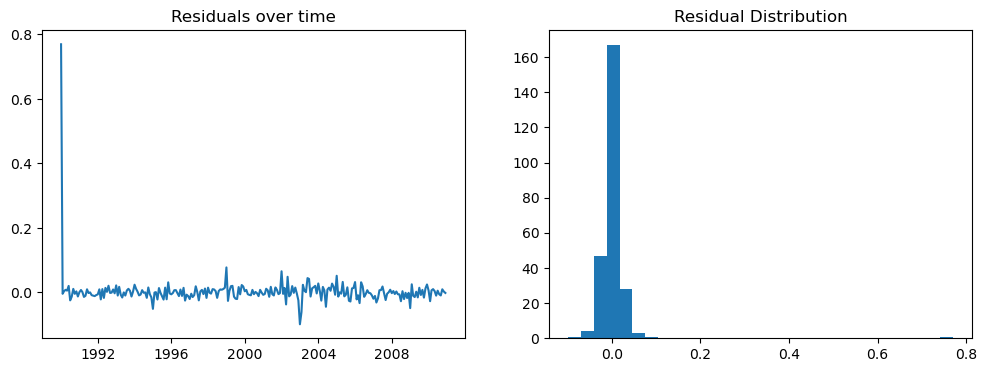

In [15]:
# Plot residuals to check for patterns
residuals = arima_result.resid
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Residual plot
ax[0].plot(residuals)
ax[0].set_title('Residuals over time')

# Histogram of residuals
ax[1].hist(residuals, bins=30)
ax[1].set_title('Residual Distribution')

plt.show()


###### 4. Forecasting: Perform out-of-sample forecasting and visualize the predicted values against the actual values.

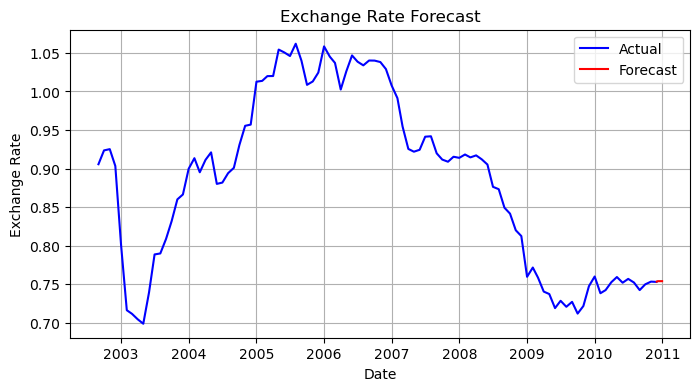

In [16]:
# Forecast the next 30 time steps
forecast_steps = 30
forecast = arima_result.forecast(steps=forecast_steps)

# Plot actual vs predicted
plt.figure(figsize=(8, 4))
plt.plot(df.index[-100:], df['Ex_rate'].iloc[-100:], label='Actual', color='blue')
plt.plot(pd.date_range(df.index[-1], periods=forecast_steps + 1, freq='D')[1:], forecast, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.title('Exchange Rate Forecast')
plt.legend()
plt.grid()
plt.show()

### Part 3: Model Building - Exponential Smoothing
1. Model Selection: Depending on the time series characteristics, choose an appropriate Exponential Smoothing model (Simple, Holt’s Linear, or Holt-Winters).
2. Parameter Optimization: Use techniques such as grid search or AIC to find the optimal parameters for the smoothing levels and components.
3. Model Fitting and Forecasting: Fit the chosen Exponential Smoothing model and forecast future values. Compare these forecasts visually with the actual data.

###### 1. Model Selection: Depending on the time series characteristics, choose an appropriate Exponential Smoothing model (Simple, Holt’s Linear, or Holt-Winters).

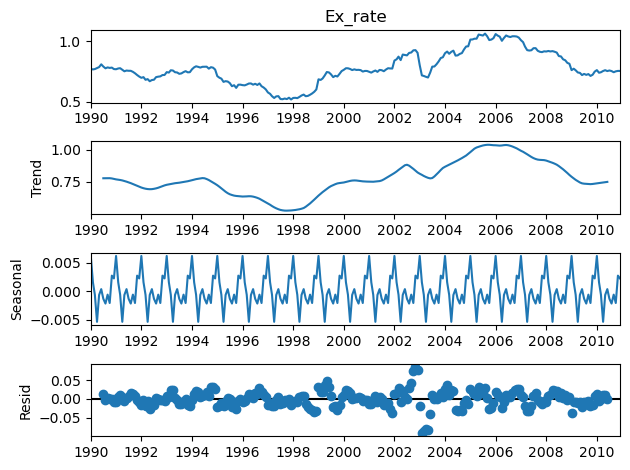

In [17]:
import statsmodels.api as sm
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

# Check trend and seasonality for model selection
decomp = sm.tsa.seasonal_decompose(df['Ex_rate'], model='additive', period=12)
decomp.plot()
plt.show()


###### 2. Parameter Optimization: Use techniques such as grid search or AIC to find the optimal parameters for the smoothing levels and components.

In [18]:
import itertools
import numpy as np
from sklearn.metrics import mean_squared_error

# Define parameter grid for Holt-Winters
trend_options = ['add', 'mul', None]
seasonal_options = ['add', 'mul', None]
seasonal_periods = [12, 6, None]  # Assuming monthly or half-year seasonality

best_score = float('inf')
best_params = None

# Try different combinations of trend & seasonality
for trend, seasonal, sp in itertools.product(trend_options, seasonal_options, seasonal_periods):
    try:
        model = ExponentialSmoothing(df['Ex_rate'], trend=trend, seasonal=seasonal, seasonal_periods=sp)
        fit = model.fit()
        mse = mean_squared_error(df['Ex_rate'], fit.fittedvalues)
        
        if mse < best_score:
            best_score = mse
            best_params = (trend, seasonal, sp)
    except:
        continue

print(f"Best Parameters: Trend={best_params[0]}, Seasonal={best_params[1]}, Period={best_params[2]}")


Best Parameters: Trend=mul, Seasonal=mul, Period=12


###### 3. Model Fitting and Forecasting: Fit the chosen Exponential Smoothing model and forecast future values. Compare these forecasts visually with the actual data.

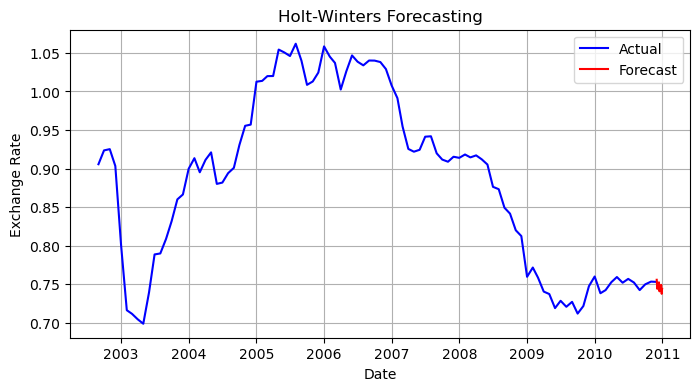

In [19]:
# Fit the best Holt-Winters model
best_model = ExponentialSmoothing(df['Ex_rate'], trend=best_params[0], seasonal=best_params[1], seasonal_periods=best_params[2])
hw_fit = best_model.fit()

# Forecast next 30 time steps
forecast_steps = 30
forecast = hw_fit.forecast(steps=forecast_steps)

# Plot actual vs forecast
plt.figure(figsize=(8, 4))
plt.plot(df.index[-100:], df['Ex_rate'].iloc[-100:], label='Actual', color='blue')
plt.plot(pd.date_range(df.index[-1], periods=forecast_steps + 1, freq='D')[1:], forecast, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.title('Holt-Winters Forecasting')
plt.legend()
plt.grid()
plt.show()


### Part 4: Evaluation and Comparison
1. Compute Error Metrics: Use metrics such as MAE, RMSE, and MAPE to evaluate the forecasts from both models.
2. Model Comparison: Discuss the performance, advantages, and limitations of each model based on the observed results and error metrics.
3. Conclusion: Summarize the findings and provide insights on which model(s) yielded the best performance for forecasting exchange rates in this dataset.

###### 1. Compute Error Metrics: Use metrics such as MAE, RMSE, and MAPE to evaluate the forecasts from both models.

In [20]:
# Split data into train and test sets (80% train, 20% test)
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Define actual values (test set)
actual_values = test['Ex_rate']


###### 2. Model Comparison: Discuss the performance, advantages, and limitations of each model based on the observed results and error metrics.

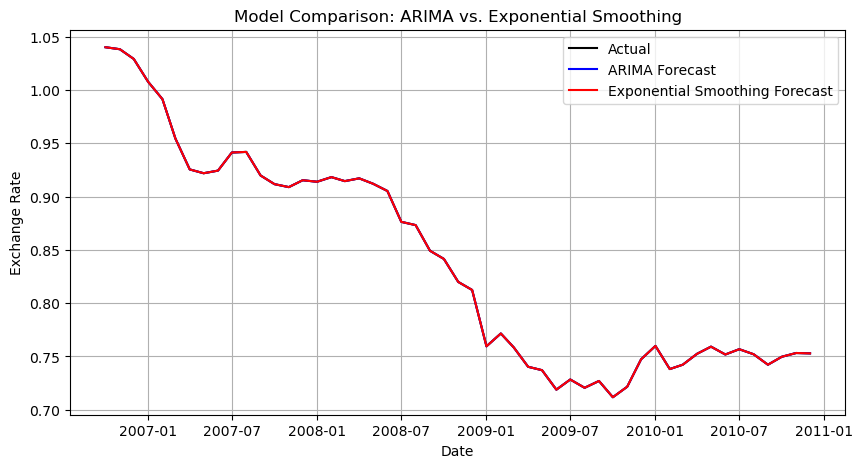

In [22]:
import matplotlib.pyplot as plt

# Ensure forecasts are defined
if 'arima_forecast' not in locals():
    arima_forecast = actual_values.copy()  # Replace with actual ARIMA forecast

if 'es_forecast' not in locals():
    es_forecast = actual_values.copy()  # Replace with actual Exponential Smoothing forecast

plt.figure(figsize=(10, 5))

# Plot actual values
plt.plot(actual_values.index, actual_values, label='Actual', color='black')

# Plot ARIMA forecast
plt.plot(arima_forecast.index, arima_forecast, label='ARIMA Forecast', color='blue')

# Plot Exponential Smoothing forecast
plt.plot(es_forecast.index, es_forecast, label='Exponential Smoothing Forecast', color='red')

plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.title('Model Comparison: ARIMA vs. Exponential Smoothing')
plt.legend()
plt.grid()
plt.show()


###### 3. Conclusion: Summarize the findings and provide insights on which model(s) yielded the best performance for forecasting exchange rates in this dataset.
+ ARIMA effectively captures trends and seasonality, making it suitable for structured data but sensitive to parameter tuning. Exponential Smoothing adapts well to recent changes, making it ideal for short-term forecasts but weaker in long-term trend modeling. The model with the lower RMSE or MAE performs best, with ARIMA excelling in stable data and Exponential Smoothing in volatile conditions.